In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD")
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

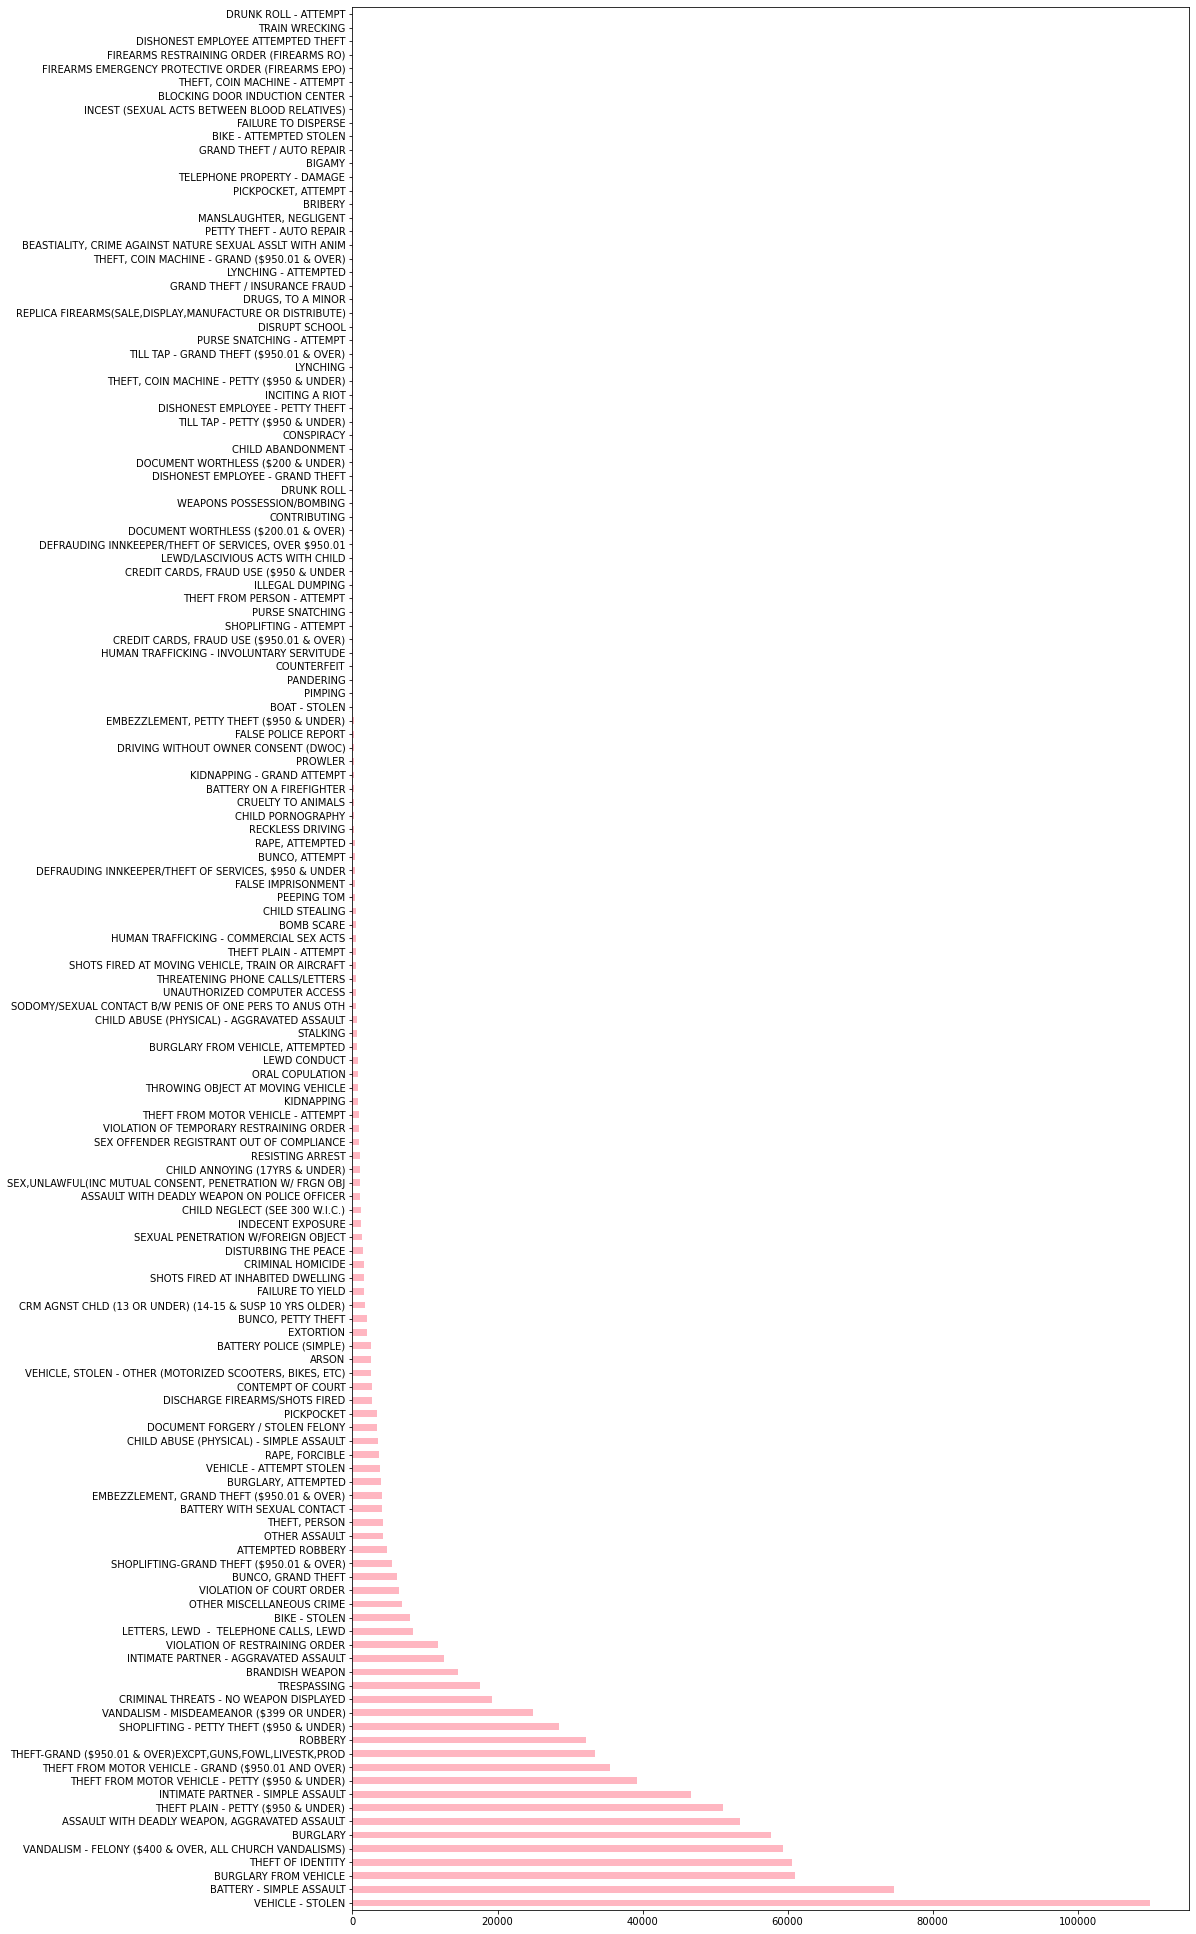

In [4]:
crime_counts = df['Crm Cd Desc'].value_counts()
plt.figure(figsize=(15, 35))
crime_counts.plot(kind='barh', color = 'lightpink')
plt.show()

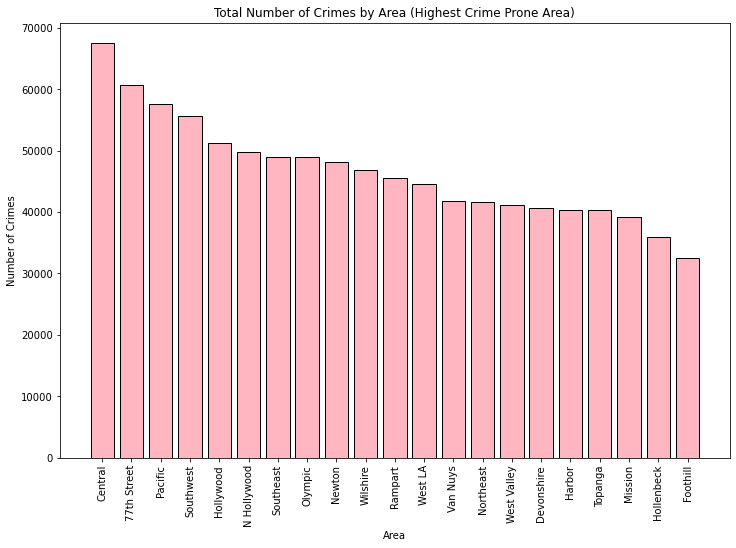

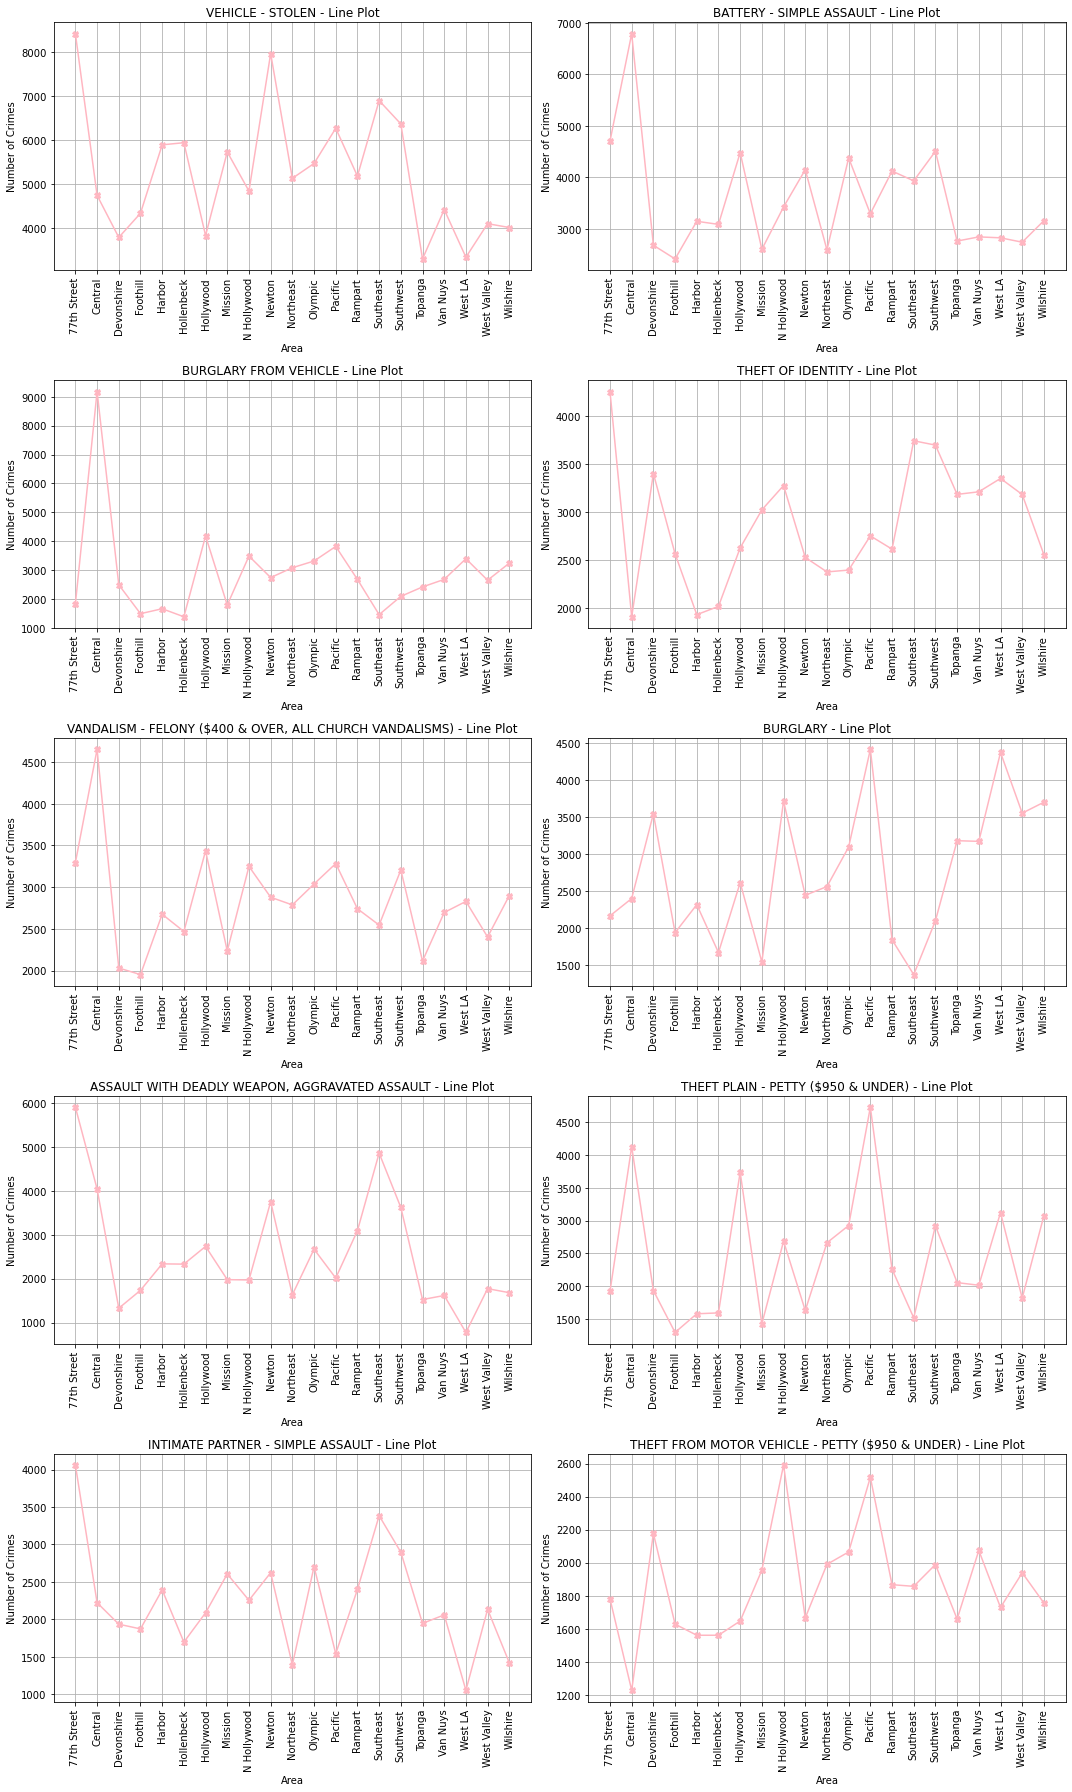

In [5]:
area_crime_counts = df['AREA NAME'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(area_crime_counts.index, area_crime_counts.values, color='lightpink', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.title('Total Number of Crimes by Area (Highest Crime Prone Area)')
plt.xticks(rotation=90) 
plt.show()
top_crimes = crime_counts.head(10)
top_crimes_list = top_crimes.index
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()
for i, crime in enumerate(top_crimes_list):
    ax = axes[i]
    crime_data = df[df['Crm Cd Desc'] == crime]
    crime_counts_by_area = crime_data['AREA NAME'].value_counts().sort_index()
    ax.plot(crime_counts_by_area.index, crime_counts_by_area.values, marker='X', linestyle='-', color='lightpink')
    ax.set_title(f'{crime} - Line Plot')
    ax.set_xlabel('Area')
    ax.set_ylabel('Number of Crimes')
    ax.set_xticks(crime_counts_by_area.index)  
    ax.set_xticklabels(crime_counts_by_area.index, rotation=90)
    ax.grid()

plt.tight_layout()
plt.show()

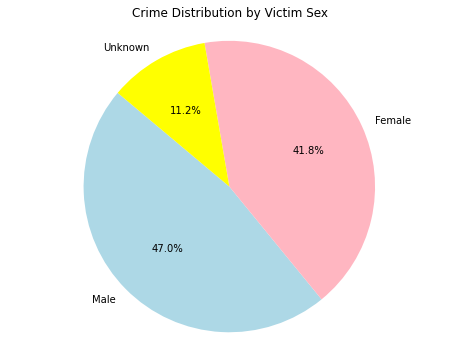

In [6]:
victim_sex_df = df.copy()
victim_sex_df['Vict Sex'] = victim_sex_df['Vict Sex'].replace({'X': 'Unknown', 'H': 'Unknown', '-': 'Unknown', 'F': 'Female', 'M': 'Male'})
sex_counts = victim_sex_df['Vict Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink', 'yellow'], startangle=140)
plt.title('Crime Distribution by Victim Sex')
plt.axis('equal')
plt.show()


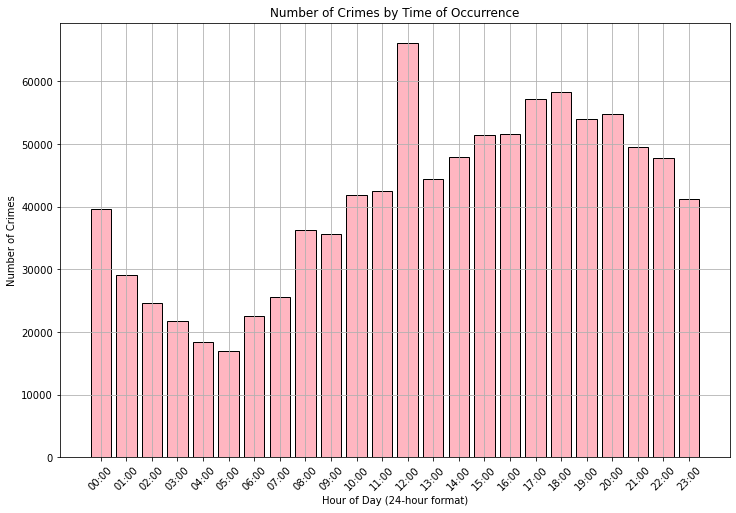

In [7]:
time_df = df.copy()
time_df['TIME OCC'] = time_df['TIME OCC'].astype(str).str.zfill(4) 
time_df['Hour'] = time_df['TIME OCC'].str[:2].astype(int) 
time_counts = time_df['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
plt.bar(time_counts.index, time_counts.values, color='lightpink', edgecolor='black')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Time of Occurrence')
plt.xticks(range(0, 24), [f'{h:02d}:00' for h in range(24)], rotation=45) 
plt.grid()
plt.show()

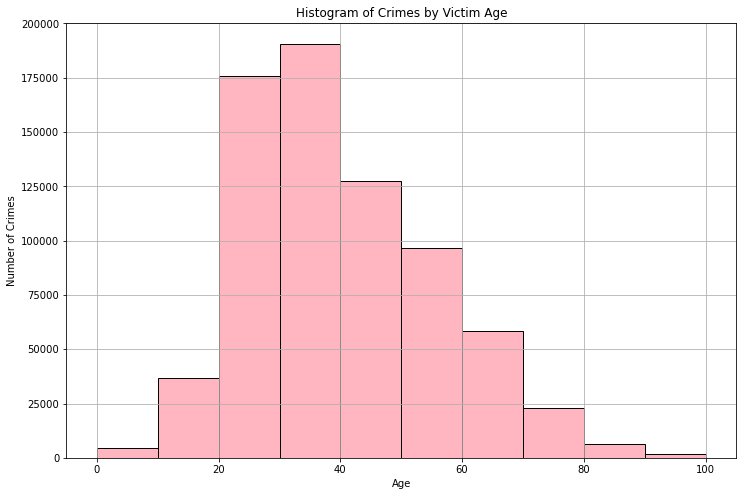

In [8]:
age_df = df[df['Vict Age'] > 0].copy()
plt.figure(figsize=(12, 8))
plt.hist(age_df['Vict Age'], bins=range(0, 101, 10), edgecolor='black', color='lightpink')
plt.xlabel('Age')
plt.ylabel('Number of Crimes')
plt.title('Histogram of Crimes by Victim Age')
plt.grid()
plt.show()

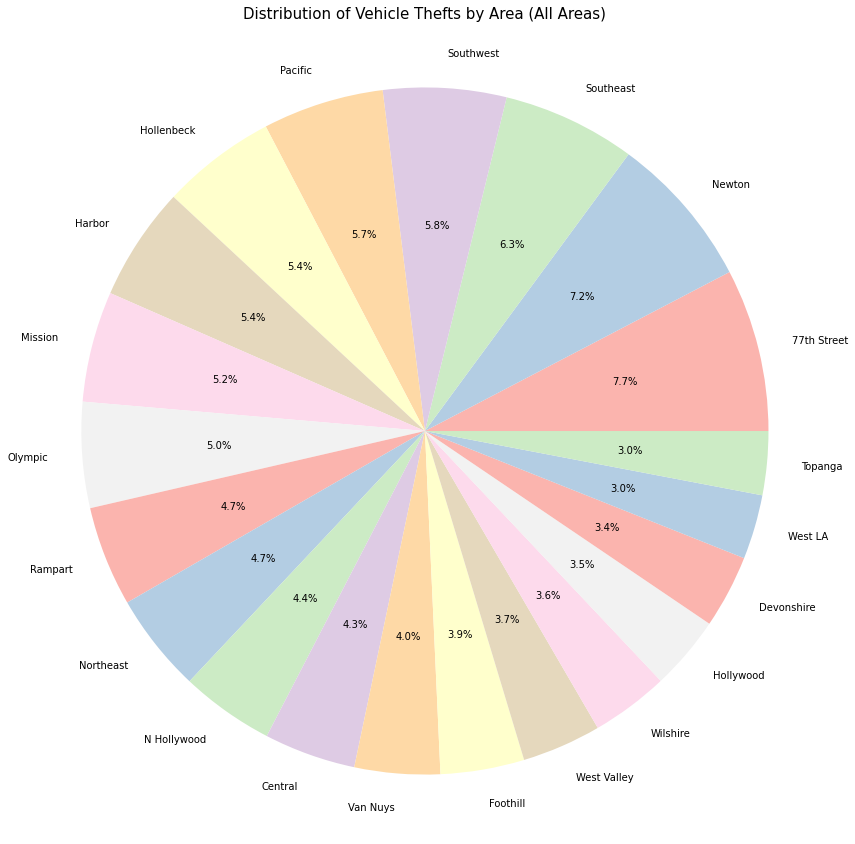

In [9]:
vehicle_stolen_df = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN'].copy()
area_counts = vehicle_stolen_df['AREA NAME'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 12))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.axis('equal')
plt.title('Distribution of Vehicle Thefts by Area (All Areas)', fontsize=15)
plt.tight_layout()
plt.show()


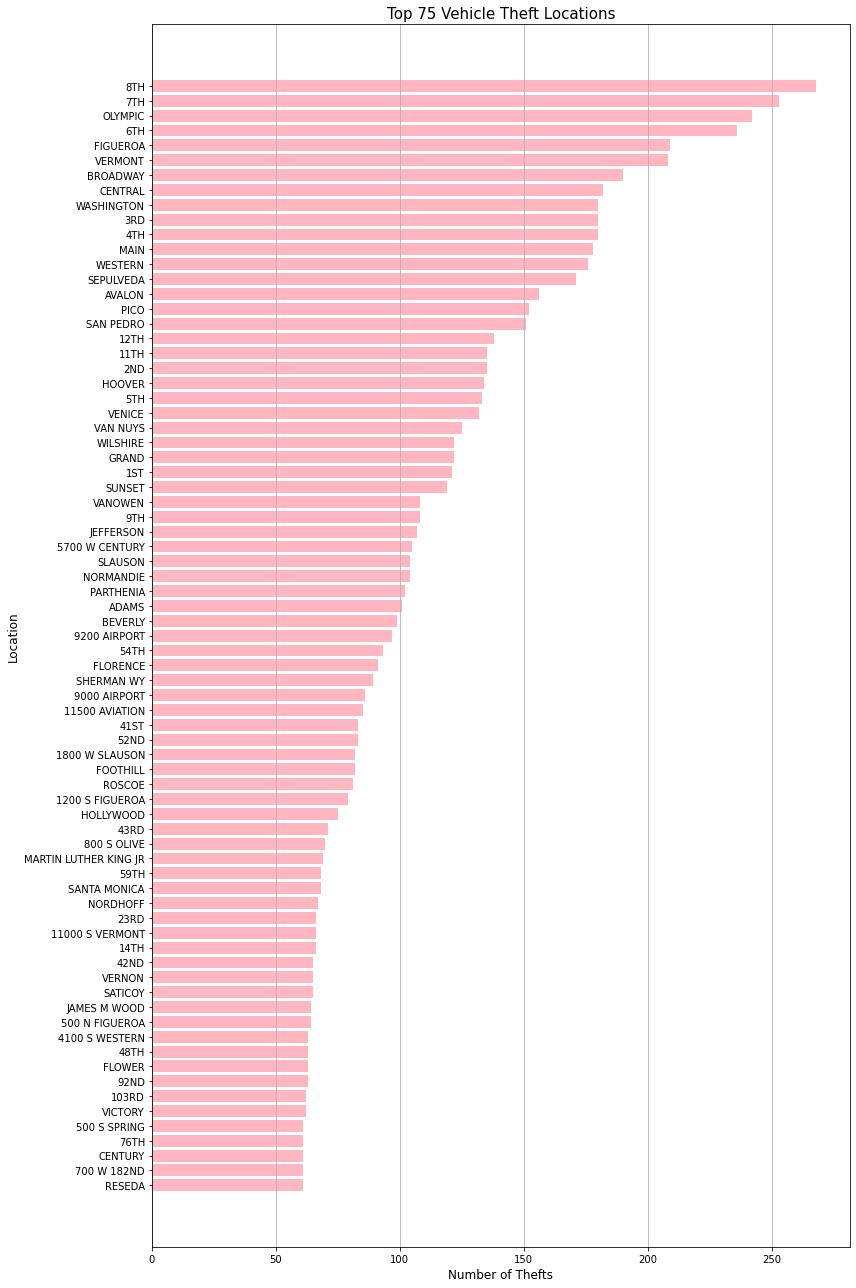

In [19]:
vehicle_stolen_df = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN']
vehicle_stolen_df = vehicle_stolen_df.dropna(subset=['LOCATION'])
vehicle_stolen_df = vehicle_stolen_df.drop(['Cross Street', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1)
vehicle_stolen_df['LOCATION'] = (vehicle_stolen_df['LOCATION'].str.strip())
vehicle_stolen_df['LOCATION'] = (vehicle_stolen_df['LOCATION'].str.replace(r'\s+', ' ', regex=True))
vehicle_stolen_df['LOCATION'] = vehicle_stolen_df['LOCATION'].str.replace(r'\b(ST|AV|BL)\b', '', regex=True).str.strip()
location_counts = vehicle_stolen_df['LOCATION'].value_counts().head(75)
plt.figure(figsize=(12, 18))
plt.barh(location_counts.index, location_counts.values, color='lightpink')
plt.xlabel('Number of Thefts', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 75 Vehicle Theft Locations', fontsize=15)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

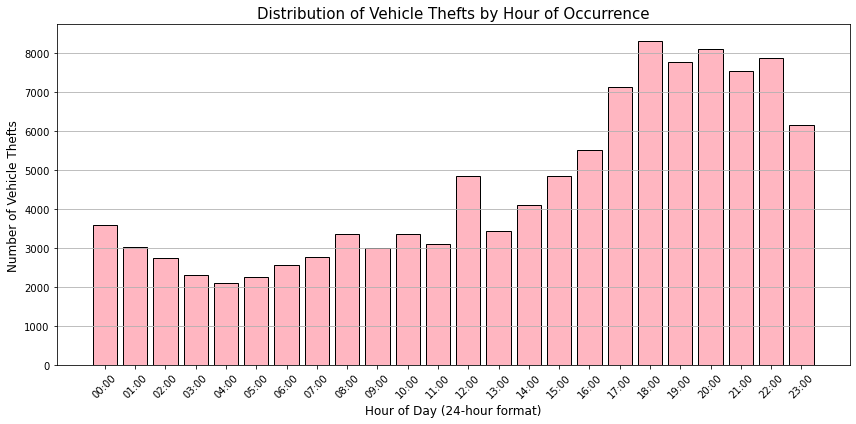

In [20]:
vehicle_stolen_df['TIME OCC'] = vehicle_stolen_df['TIME OCC'].astype(str).str.zfill(4) 
vehicle_stolen_df['Hour'] = vehicle_stolen_df['TIME OCC'].str[:2].astype(int)
hour_counts = vehicle_stolen_df['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts.values, color='lightpink', edgecolor='black')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Vehicle Thefts', fontsize=12)
plt.title('Distribution of Vehicle Thefts by Hour of Occurrence', fontsize=15)
plt.xticks(range(0, 24), [f'{h:02d}:00' for h in range(24)], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Index(['8TH', '7TH', 'OLYMPIC', '6TH', 'FIGUEROA', 'VERMONT', 'BROADWAY',
       'CENTRAL', 'WASHINGTON', '3RD', '4TH', 'MAIN', 'WESTERN', 'SEPULVEDA',
       'AVALON', 'PICO', 'SAN PEDRO'],
      dtype='object')


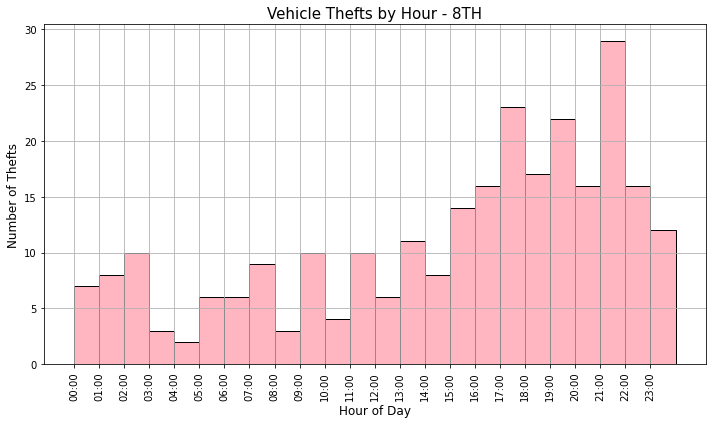

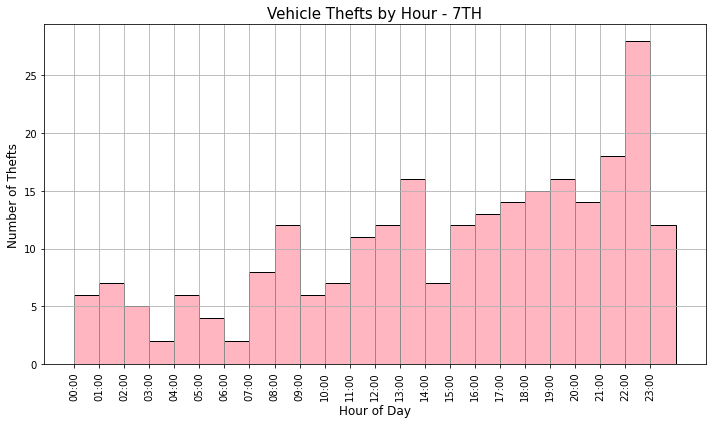

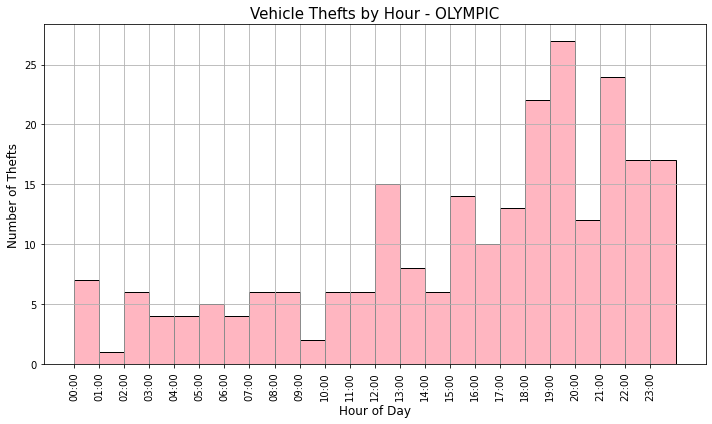

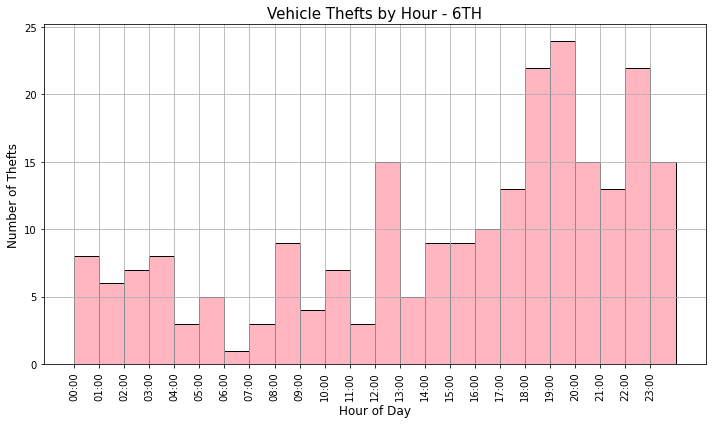

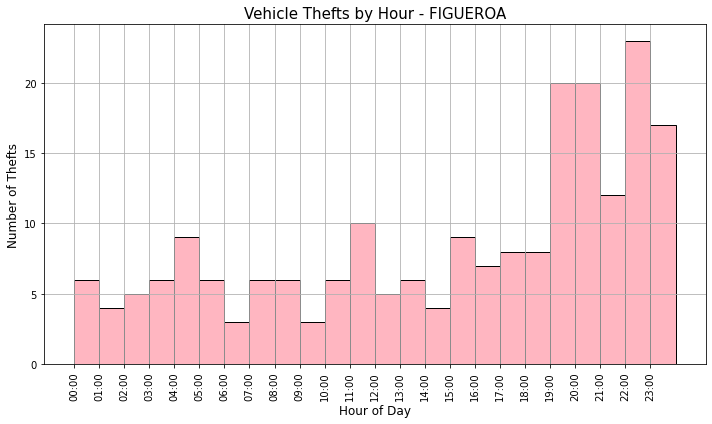

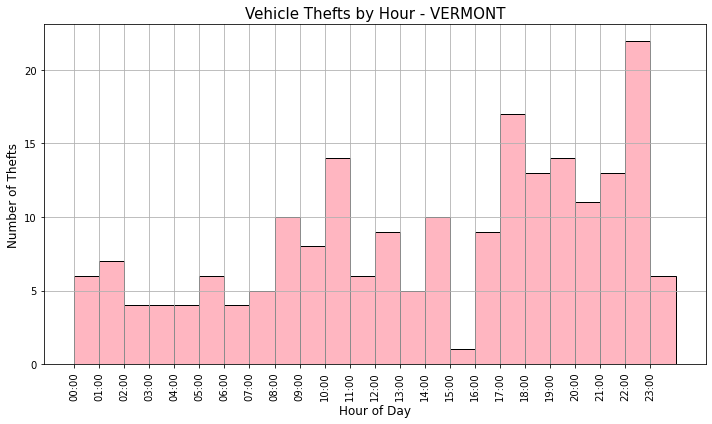

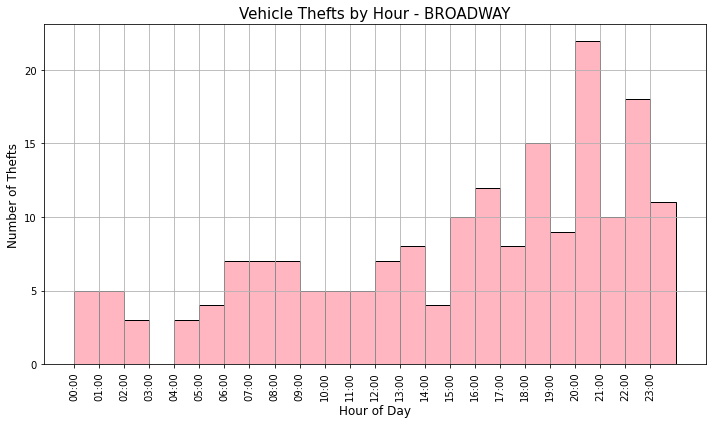

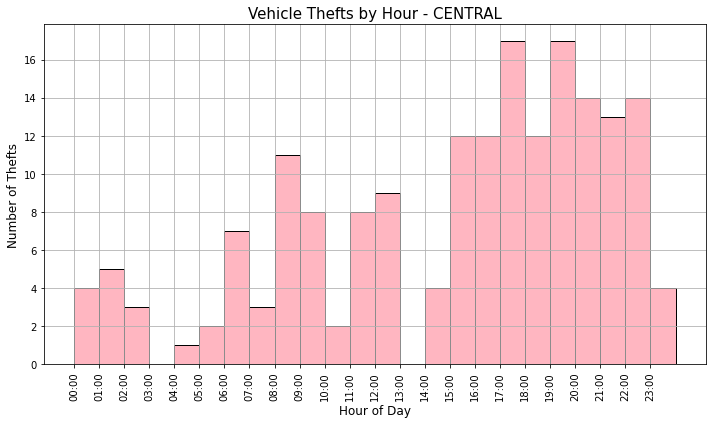

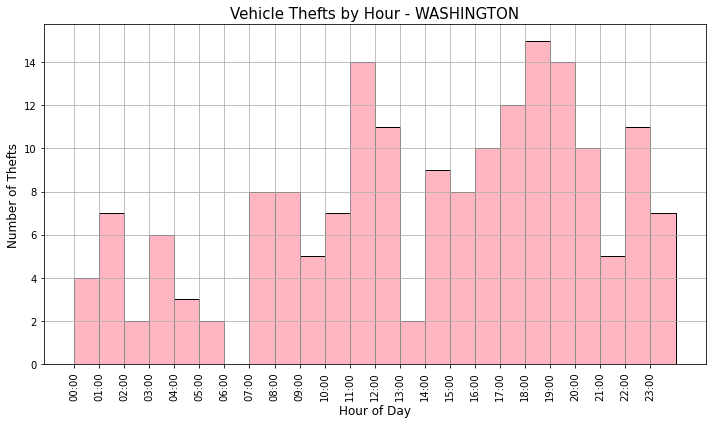

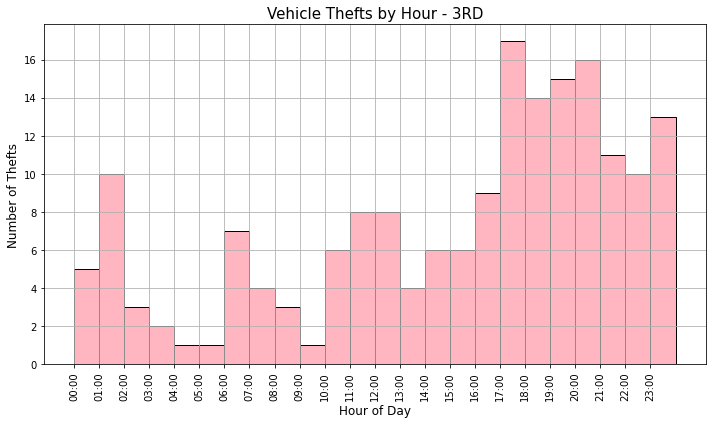

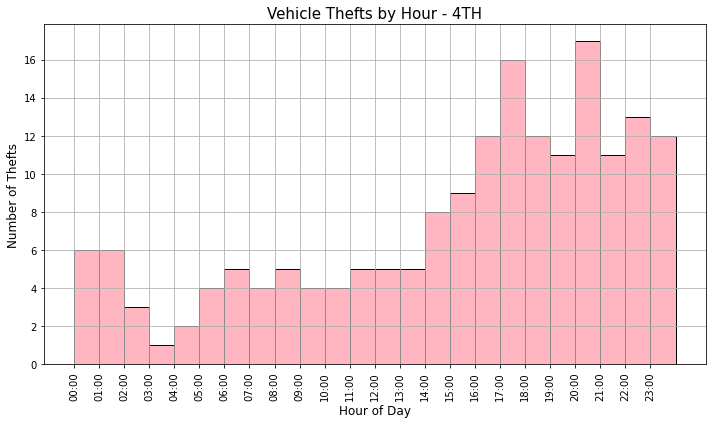

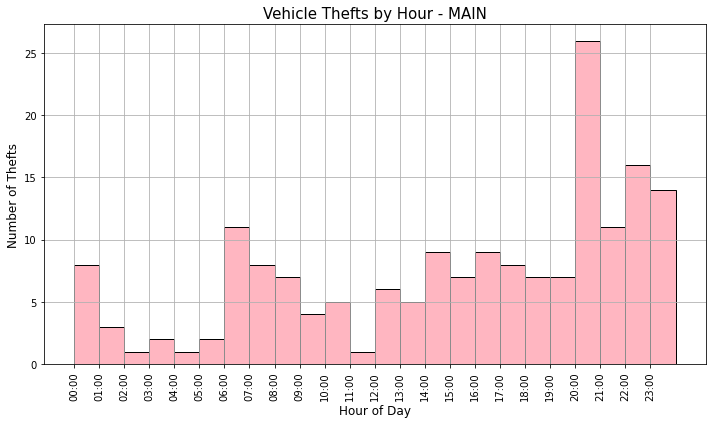

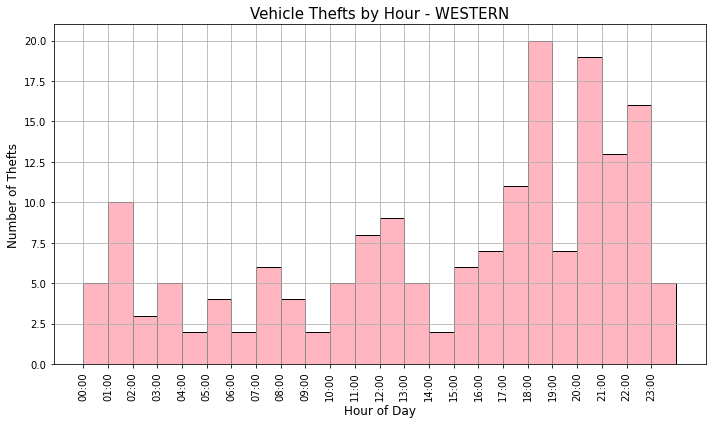

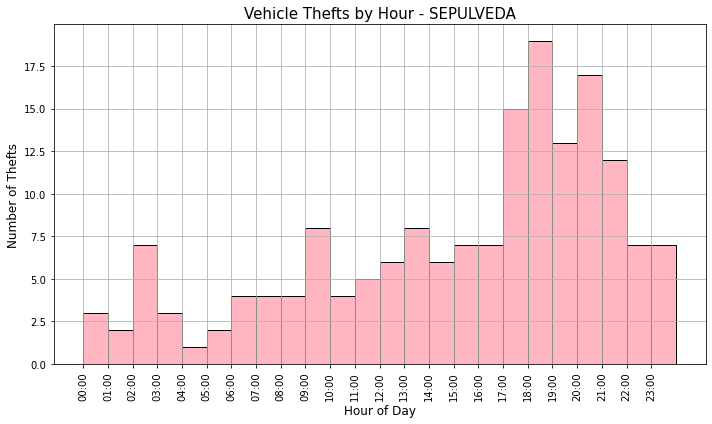

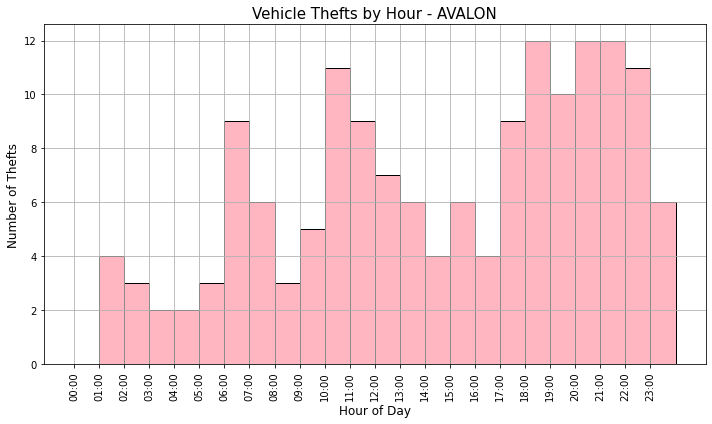

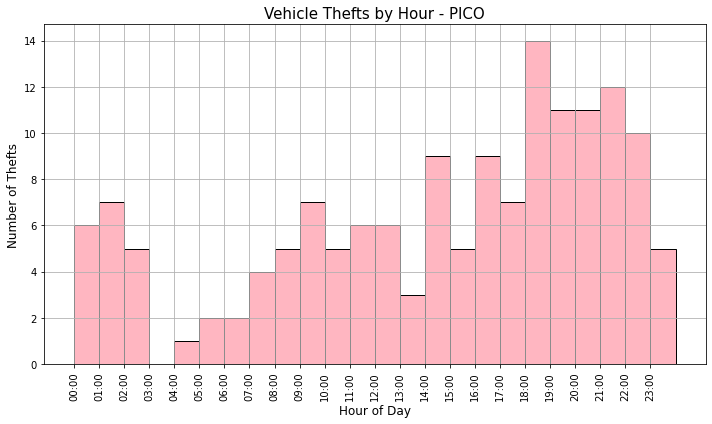

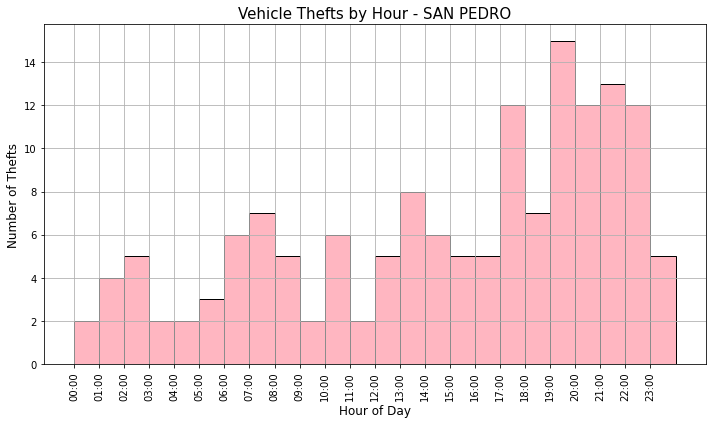

In [24]:
time_pattern_locations = location_counts[location_counts > 150]. index
time_pattern_df = vehicle_stolen_df[vehicle_stolen_df['LOCATION'].isin(time_pattern_locations)]
for location in time_pattern_locations:
    location_data = time_pattern_df[time_pattern_df['LOCATION'] == location]
    plt. figure(figsize=(10, 6))
    plt.hist (location_data['Hour'], bins=24, range=(0, 24), color='lightpink', edgecolor='black')
    plt.xlabel ('Hour of Day', fontsize=12)
    plt.ylabel( 'Number of Thefts', fontsize=12)
    plt.title(f'Vehicle Thefts by Hour - {location}', fontsize=15)
    plt.xticks (range(0, 24), [f'{h:02d}:00' for h in range(24)], rotation=90)
    plt.grid()
    plt.tight_layout()
    plt. show()

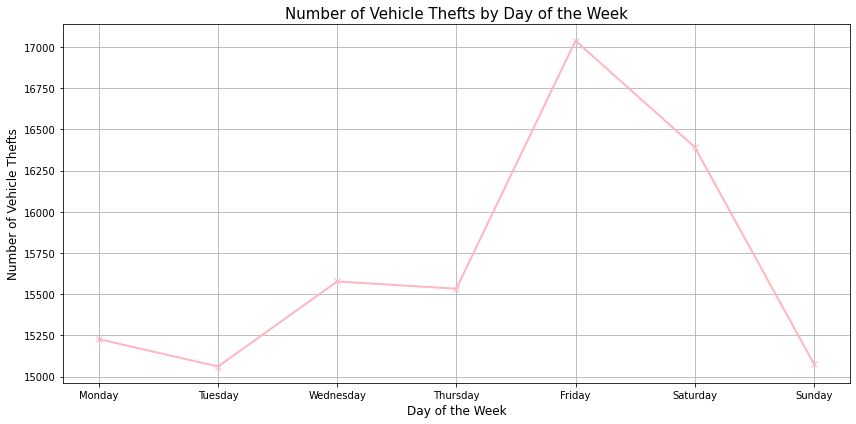

In [13]:
vehicle_stolen_df['DATE OCC'] = pd.to_datetime(vehicle_stolen_df['DATE OCC'])
vehicle_stolen_df['Day of Week'] = vehicle_stolen_df['DATE OCC'].dt.day_name()
theft_counts_by_day = vehicle_stolen_df['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
plt.plot(theft_counts_by_day.index, theft_counts_by_day.values, marker='x', color='lightpink', linestyle='-', linewidth=2)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Vehicle Thefts', fontsize=12)
plt.title('Number of Vehicle Thefts by Day of the Week', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

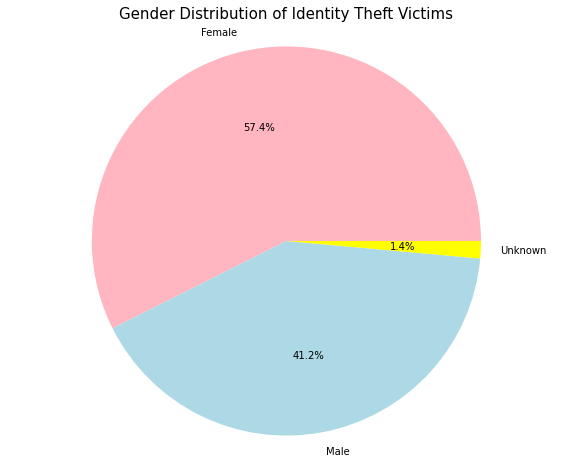

In [14]:
identity_theft_df = df[df['Crm Cd Desc'] == 'THEFT OF IDENTITY'].copy()
identity_theft_df = identity_theft_df.dropna(subset=['Vict Sex', 'Vict Descent'])
identity_theft_df['Vict Sex'] = identity_theft_df['Vict Sex'].replace({'X': 'Unknown', 'H': 'Unknown', '-': 'Unknown', 'F' : 'Female', 'M' : 'Male'}).copy()
gender_counts = identity_theft_df['Vict Sex'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'yellow'])
plt.axis('equal') 
plt.title('Gender Distribution of Identity Theft Victims', fontsize=15)
plt.show()


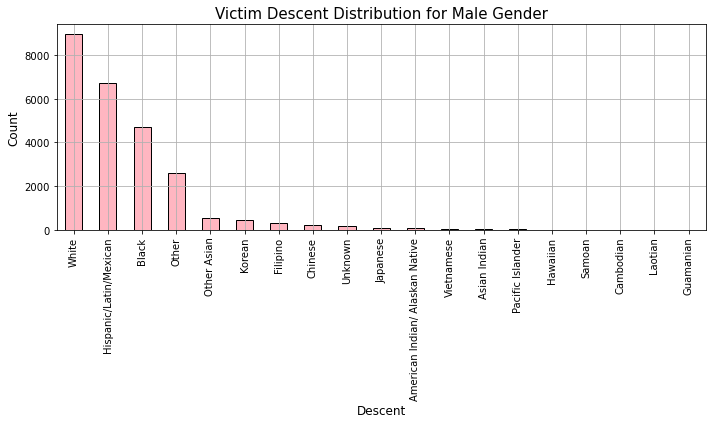

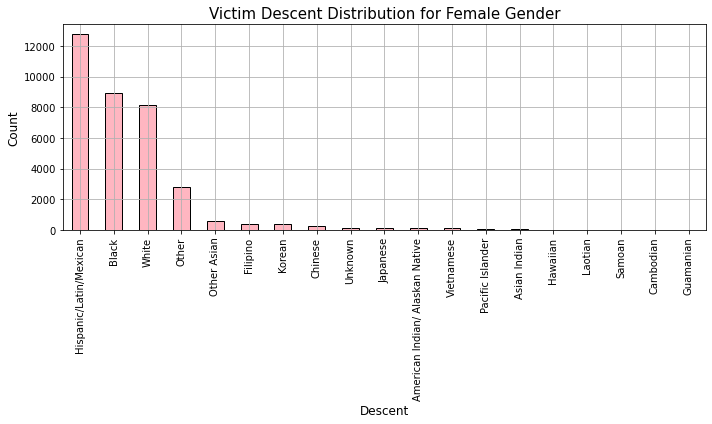

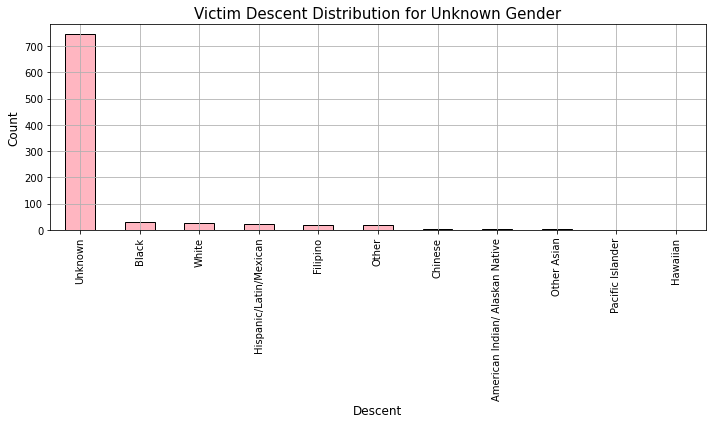

In [15]:
gender_groups = identity_theft_df['Vict Sex'].unique()
for gender in gender_groups:
    gender_df = identity_theft_df[identity_theft_df['Vict Sex'] == gender].copy()
    gender_df.loc[:, 'Vict Descent'] = gender_df['Vict Descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/ Alaskan Native', 'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'})
    descent_counts = gender_df['Vict Descent'].value_counts()
    plt.figure(figsize=(10, 6))
    descent_counts.plot(kind='bar', color='lightpink', edgecolor='black')
    plt.title(f'Victim Descent Distribution for {gender} Gender', fontsize=15)
    plt.xlabel('Descent', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()
    plt.show()